# Evaluation Metrics

Types of Predictive models<br>
When we talk about predictive models, we are talking either about a regression model (continuous output) or a classification model (nominal or binary output). The evaluation metrics used in each of these models are different.
In classification problems, we use two types of algorithms (dependent on the kind of output it creates):<br>

Class output: Algorithms like SVM and KNN create a class output. For instance, in a binary classification problem, the outputs will be either 0 or 1. However, today we have algorithms which can convert these class outputs to probability. But these algorithms are not well accepted by the statistics community.<br><br>
Probability output: Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Converting probability outputs to class output is just a matter of creating a threshold probability.<br><br>
In regression problems, we do not have such inconsistencies in output. The output is always continuous in nature and requires no further treatment.

 

# 1. Confusion Matrix

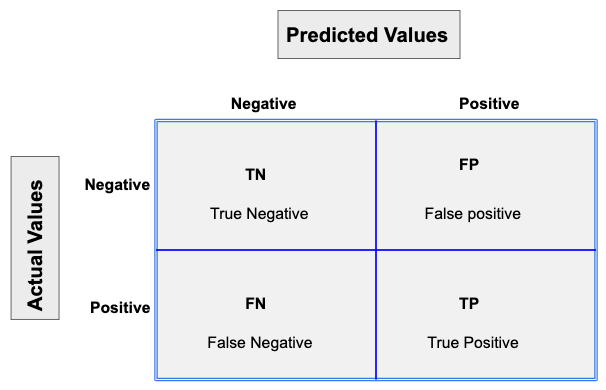

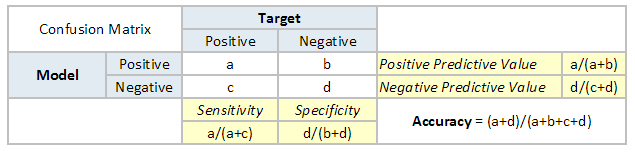

[[13  0  0]
 [ 0 17  2]
 [ 0  0 18]]


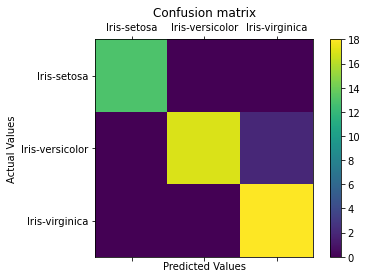

In [1]:
import warnings
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline  

#ignore warnings
warnings.filterwarnings('ignore')
# Load digits dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)
# df = df.values
X = df.iloc[:,0:4]
y = df.iloc[:,4]
#test size
test_size = 0.33
#generate the same set of random numbers
seed = 7
#Split data into train and test set. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#Train Model
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Construct the Confusion Matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm = confusion_matrix(y_test, pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## 1. Accuracy</br>
Accuracy = (TP+TN)/total</br>
It’s the number of correct predictions made as a ratio of all predictions made.</br>
### Misclassification Rate(Error Rate)</br>
Overall, how often is it wrong.</br>
Misclassification Rate = (FP+FN)/total</br><br>
## 2. Precision</br>
When it predicts yes, how often is it correct?</br>
Precision=TP/TP+FP<br></br>
## 3. Recall or Sensitivity</br>
When it’s actually yes, how often does it predict yes?</br>
True Positive Rate = TP/TP+FN</br>
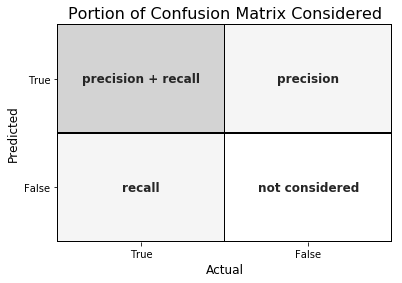
## 4. F1 Score</br>
The F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.</br>

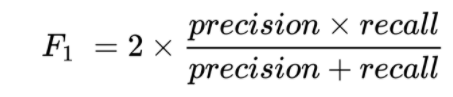

The harmonic mean is:<br><br>

the reciprocal of the average of the reciprocals<br><br>

Reciprocal just means  1/value.<br><br>

The formula is:
<br><br>
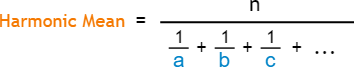

Where a,b,c,... are the values, and n is how many values.

Steps: <br><br>

Calculate the reciprocal (1/value) for every value.<br><br>
Find the average of those reciprocals (just add them and divide by how many there are)<br><br>
Then do the reciprocal of that average (=1/average)<br><br><br><br>
Example: What is the harmonic mean of 1, 2 and 4?<br><br>
The reciprocals of 1, 2 and 4 are:<br><br>

11  = 1,    12  = 0.5,    14  = 0.25<br><br>

Now add them up:</br></br>

1 + 0.5 + 0.25 = 1.75<br><br>
Divide by how many:<br><br>

Average =  1.753 <br><br>

The reciprocal of that average is our answer:<br><br>

Harmonic Mean =  31.75  = 1.714 (to 3 places)<br><br>

Why Harmonic mean not any other mean(arithmetic mean)?<br>
In some rate type questions the harmonic mean gives the true answer!<br><br>
The harmonic mean is also good at handling large outliers.<br><br>
But small outliers will make things worse!<br><br>

Why harmonic mean? <br><br>Since the harmonic mean of a list of numbers skews strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones.

In [4]:
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
test_size = 0.33
seed = 7

model = LogisticRegression()
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)


Precision: 0.701493
Recall: 0.552941
F1 score: 0.618421


## 5. Specificity<br>
 
When it’s no, how often does it predict no?<br>

True Negative Rate=TN/actual no<br>

It is the true negative rate or the proportion of true negatives to everything that should have been classified as negative.<br>

Note : together, specificity and sensitivity consider the full confusion matrix<br>



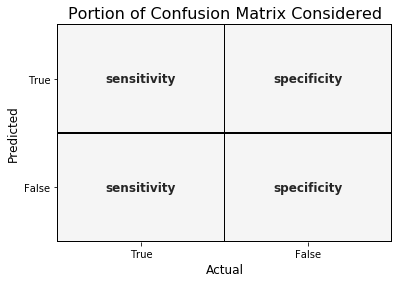

## 6. Receiver Operating Characteristics (ROC) Curve<br>
 
Measuring the area under the ROC curve is also a very useful method for evaluating a model. By plotting the true positive rate (sensitivity) versus the false-positive rate (1 — specificity), we get the Receiver Operating Characteristic (ROC) curve. This curve allows us to visualize the trade-off between the true positive rate and the false positive rate.<br>

The following are examples of good ROC curves. The dashed line would be random guessing (no predictive value) and is used as a baseline; anything below that is considered worse than guessing. We want to be toward the top-left corner:<br>

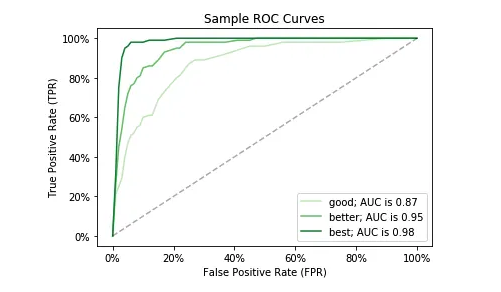



AUC - Test Set: 82.85%


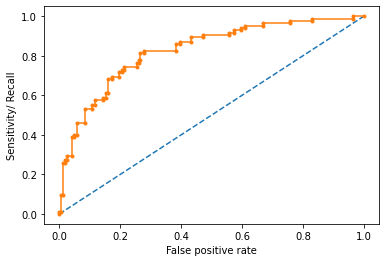

In [5]:
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In the example above, the AUC is relatively close to 1 and greater than 0.5. A perfect classifier will have the ROC curve go along the Y-axis and then along the X-axis.

# Log Loss<br>
Log Loss is the most important classification metric based on probabilities.<br>
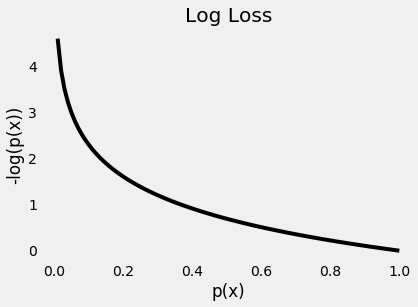
As the predicted probability of the true class gets closer to zero, the loss increases exponentially<br><br>

It measures the performance of a classification model where the prediction input is a probability value between 0 and 1. Log loss increases as the predicted probability diverge from the actual label. The goal of any machine learning model is to minimize this value. As such, smaller log loss is better, with a perfect model having a log loss of 0.<br>

In [6]:
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 7.89


# Jaccard Index <br>
 
Jaccard Index is one of the simplest ways to calculate and find out the accuracy of a classification ML model. Let’s understand it with an example. Suppose we have a labeled test set, with labels as –<br><br>

y = [0,0,0,0,0,1,1,1,1,1]<br><br>


And our model has predicted the labels as –<br><br>

y1 = [1,1,0,0,0,1,1,1,1,1]<br><br>


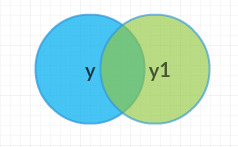

The above Venn diagram shows us the labels of the test set and the labels of the predictions, and their intersection and union.<br><br>
Jaccard Index or Jaccard similarity coefficient is a statistic used in understanding the similarities between sample sets. The measurement emphasizes the similarity between finite sample sets and is formally defined as the size of the intersection divided by the size of the union of the two labeled sets, with formula as –<br><br>

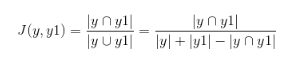

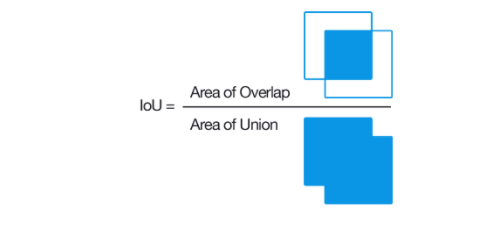

So, for our example, we can see that the intersection of the two sets is equal to 8 (since eight values are predicted correctly) and the union is 10 + 10–8 = 12. So, the Jaccard index gives us the accuracy as –

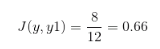

So, the accuracy of our model, according to Jaccard Index, becomes 0.66, or 66%.<br>

Higher the Jaccard index higher the accuracy of the classifier.<br>

A sample python implementation of the Jaccard index.<br>

In [9]:
import numpy as np

def compute_jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

score = compute_jaccard_similarity_score(np.array([0, 1, 2, 5, 6]), np.array([0, 2, 3, 5, 7, 9]))
print("Jaccard Similarity Score : %s",score)
pass

Jaccard Similarity Score : %s 0.375
